<a href="https://colab.research.google.com/github/kaylay18/Bowling-Advice-Chatbox/blob/main/preprocessing-ML%20training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing and Exploratory Data Analysis (EDA)

In [1]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.2 MB/s eta 0:00:00


In [2]:
!pip install scikit-learn

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import shap
from skopt import BayesSearchCV, gp_minimize
from skopt.space import Real, Integer
import math
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
import joblib
import plotly.graph_objects as go

In [4]:
# Load the dataset
file_name = 'Bowling_Personal_Data.xlsx' # change to our dataset
df = pd.read_excel(file_name)
df.head()

,Player,Pins_hit_1,Pins_hit_2,Throw_height_1,Throw_height_2,Speed_1,Speed_2
0,Trevor,2,3,med,med,med,fast
1,Trevor,1,5,med,low,slow,med
2,Trevor,10,0,med,med,med,med
3,Trevor,4,3,low,low,slow,fast
4,Trevor,5,3,low,med,slow,slow


In [5]:
# Identify numeric columns (integer and float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (object)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("\nNumeric columns:", numeric_columns)
print("\nCategorical columns:", categorical_columns)


Numeric columns: ['Pins_hit_1', 'Pins_hit_2']

Categorical columns: ['Player', 'Throw_height_1', 'Throw_height_2', 'Speed_1', 'Speed_2']


In [6]:
# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded dataset
df_encoded.head()

,Pins_hit_1,Pins_hit_2,Player_Frank,Player_Harry,Player_Kayla,Player_Trevor,Throw_height_1_high,Throw_height_1_low,Throw_height_1_med,Throw_height_2_high,Throw_height_2_low,Throw_height_2_med,Speed_1_fast,Speed_1_med,Speed_1_slow,Speed_2_fast,Speed_2_med,Speed_2_slow
0,2,3,False,False,False,True,False,False,True,False,False,True,False,True,False,True,False,False
1,1,5,False,False,False,True,False,False,True,False,True,False,False,False,True,False,True,False
2,10,0,False,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False
3,4,3,False,False,False,True,False,True,False,False,True,False,False,False,True,True,False,False
4,5,3,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True


In [7]:
# df_encoded = pd.get_dummies(df, columns=['Player', 'Throw_height_1', 'Throw_height_2', 'Speed_1', 'Speed_2'])
# df_encoded = df_encoded.astype(float)
# df_encoded.head()

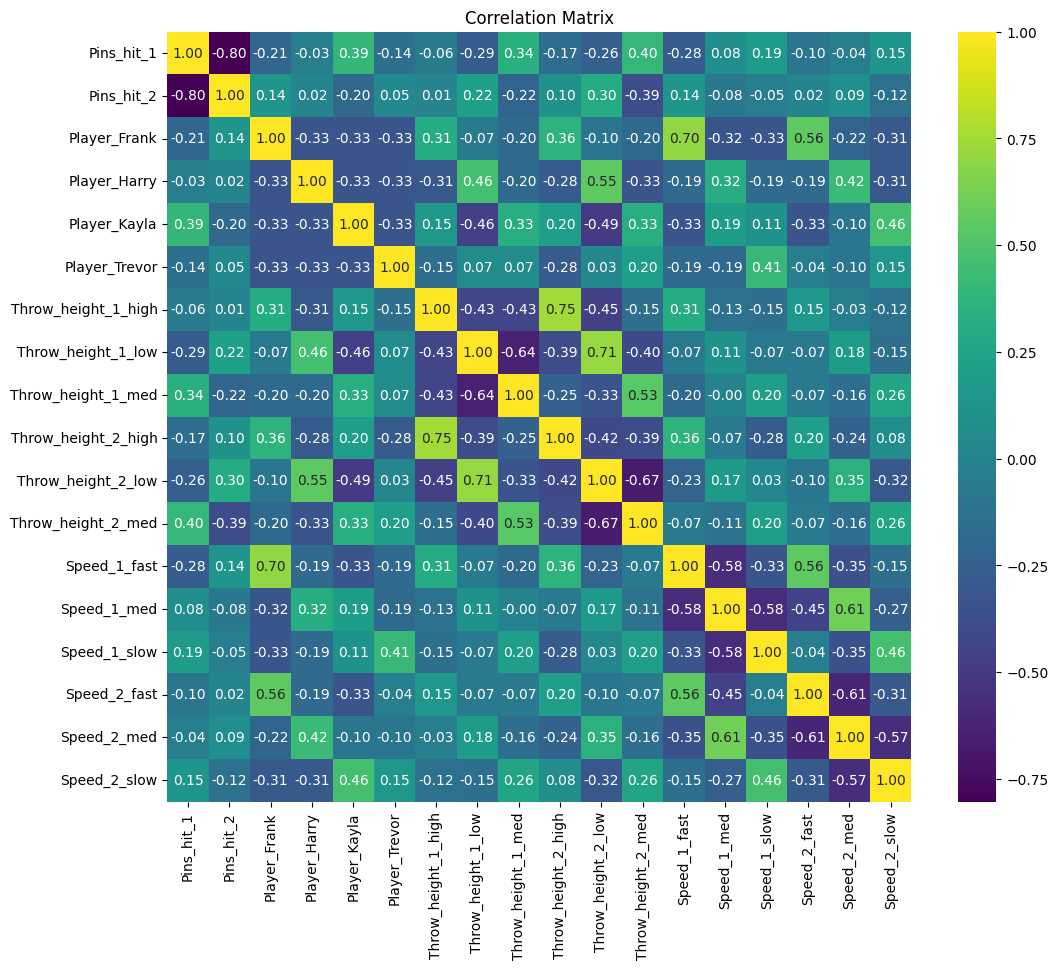

In [8]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#Significant Correlations:
Noting correlation values above |0.5| for:
-Harry and low throw height
-Frank and fast throw speed

##Analyzing trends in the dataset

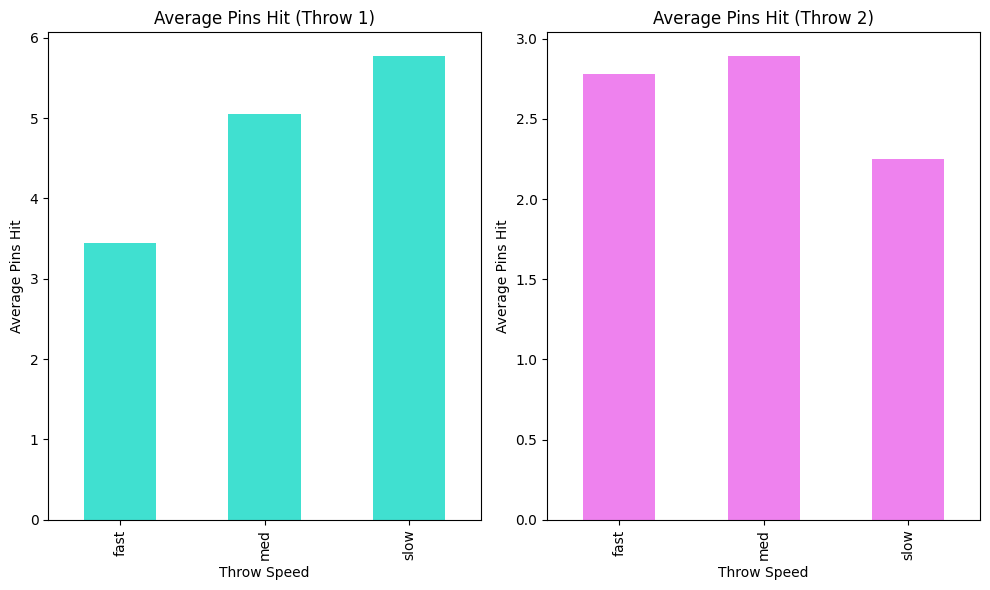

In [9]:
# Analyzing how throw speed affects pins hit
avg_pins_hit_1 = df.groupby('Speed_1')['Pins_hit_1'].mean()
avg_pins_hit_2 = df.groupby('Speed_2')['Pins_hit_2'].mean()

# Create bar plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
avg_pins_hit_1.plot(kind='bar', color='turquoise')
plt.title('Average Pins Hit (Throw 1)')
plt.xlabel('Throw Speed')
plt.ylabel('Average Pins Hit')

plt.subplot(1, 2, 2)
avg_pins_hit_2.plot(kind='bar', color='violet')
plt.title('Average Pins Hit (Throw 2)')
plt.xlabel('Throw Speed')
plt.ylabel('Average Pins Hit')

plt.tight_layout()
plt.show()

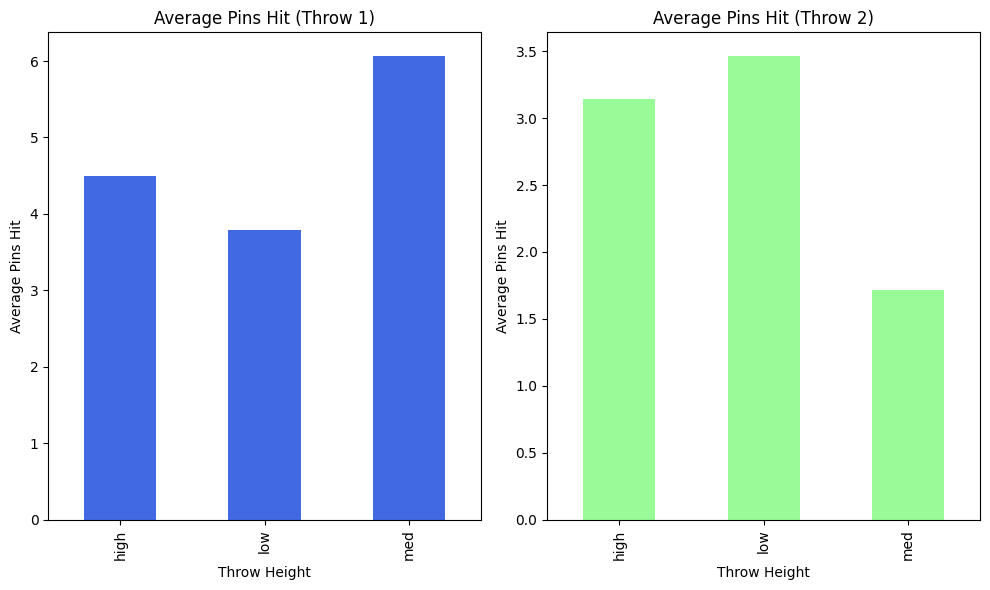

In [10]:
# Analyzing how throw height affects pins hit
avg_pins_hit_1 = df.groupby('Throw_height_1')['Pins_hit_1'].mean()
avg_pins_hit_2 = df.groupby('Throw_height_2')['Pins_hit_2'].mean()

# Create bar plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
avg_pins_hit_1.plot(kind='bar', color='royalblue')
plt.title('Average Pins Hit (Throw 1)')
plt.xlabel('Throw Height')
plt.ylabel('Average Pins Hit')

plt.subplot(1, 2, 2)
avg_pins_hit_2.plot(kind='bar', color='palegreen')
plt.title('Average Pins Hit (Throw 2)')
plt.xlabel('Throw Height')
plt.ylabel('Average Pins Hit')

plt.tight_layout()
plt.show()

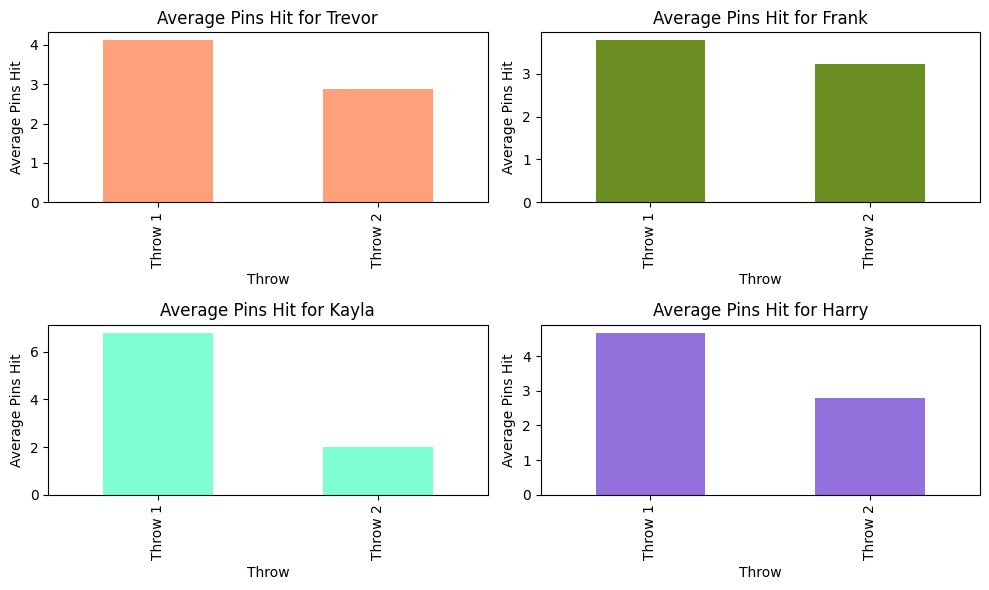

In [11]:
# Analyzing average pins hit per throw per player
# List of players to plot
players = ['Trevor', 'Frank', 'Kayla', 'Harry']
colors = ['lightsalmon', 'olivedrab', 'aquamarine', 'mediumpurple']

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

for i, (player,color) in enumerate(zip(players,colors)):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    player_data = df[df['Player'] == player]

    # Calculate average pins hit for the player
    avg_pins_hit = player_data[['Pins_hit_1', 'Pins_hit_2']].mean()

    # Create a bar plot
    avg_pins_hit.plot(kind='bar', ax=ax, color=color)
    ax.set_title(f'Average Pins Hit for {player}')
    ax.set_xlabel('Throw')
    ax.set_ylabel('Average Pins Hit')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Throw 1', 'Throw 2'])

plt.tight_layout()
plt.show()

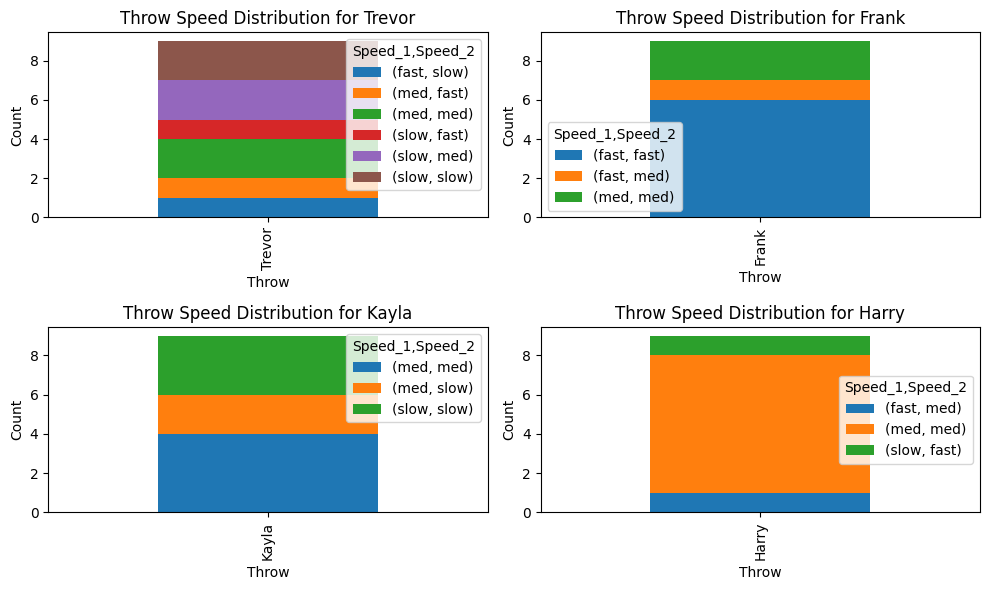

In [12]:
# Analyzing throw speed distributions of each person
players = ['Trevor', 'Frank', 'Kayla', 'Harry']

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

for i, player in enumerate(players):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    player_data = df[df['Player'] == player]

    pivot_table = player_data.pivot_table(index='Player', columns=['Speed_1', 'Speed_2'], aggfunc='size')

    pivot_table.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Throw Speed Distribution for {player}')
    ax.set_xlabel('Throw')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

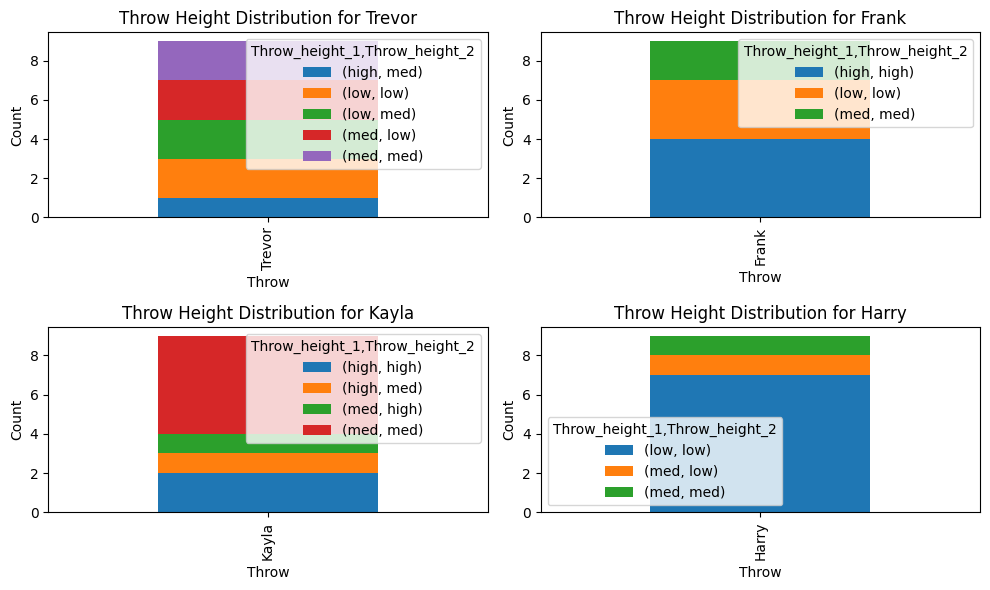

In [13]:
# Analyzing throw height distributions of each person
players = ['Trevor', 'Frank', 'Kayla', 'Harry']

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

for i, player in enumerate(players):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Filter the DataFrame for the selected player
    player_data = df[df['Player'] == player]

    # Create a pivot table to count occurrences of each throw speed category for each throw
    pivot_table = player_data.pivot_table(index='Player', columns=['Throw_height_1', 'Throw_height_2'], aggfunc='size')

    # Plot the stacked bar chart
    pivot_table.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Throw Height Distribution for {player}')
    ax.set_xlabel('Throw')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

#Machine Learning Model Development

### Throw 1 ML Training

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Separate features and target
X = df[['Throw_height_2', 'Speed_2']]
y = df['Pins_hit_2']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
categorical_cols = ['Throw_height_2', 'Speed_2']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))  # Use RandomForestRegressor
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 7.636678382110828
R-squared: -0.7517828546777527


## Comparing Various ML Modes
---
Comparing various models is a crucial step in the process of building machine learning systems.
Comparing various models is essential for making informed decisions about the selection and deployment of machine learning models. It helps in understanding their strengths and weaknesses, guiding further optimization efforts, and ensuring that the chosen model aligns with the goals and constraints of the specific task at hand.

 Various machine learning models were compared using just the numerical columns

#### Comparing the various ML models using both the numerical and categorical columns.
The categorical are transformed using onehot encoding (pd.get_dummies())

In [15]:
# Apply one-hot encoding to specific columns
encoded_df = pd.get_dummies(df, columns=['Player', 'Speed_1', 'Speed_2', 'Throw_height_1', 'Throw_height_2'])
x = encoded_df.drop('Pins_hit_1',axis=1)
y = encoded_df['Pins_hit_1']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Initialize models
models = {
    'SGD': SGDRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'MLP': MLPRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
    'Extra Trees': ExtraTreesRegressor()
}

# Train and evaluate each model
selected_models = []
for name, model in models.items():
    model.fit(X_train, y_train)  # Train with scaled data
    y_pred = model.predict(X_test)  # Predict with scaled test data
    r2 = r2_score(y_test, y_pred)
    if r2 > 0.90:
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"{name} R² Score: {r2:.3f}, Mean Squared Error: {mse:.3f}, MAE: {mae:.3f}")
        print(' ')
        selected_models.append((name, model))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Cross validation
---
 Is a technique for evaluating a machine learning model and testing its performance. CV is commonly used in applied ML tasks. It helps to compare and select an appropriate model for the specific predictive modeling problem. The overall aim of Cross-Validation is to use it as a tool to evaluate machine learning models, by training a number of models on different subsets of the input data.

Cross-validation can be used to detect overfitting in a model which infers that the model is not effectively generalizing patterns and similarities in the new inputted data.



#### A typical Cross-Validation workflow:


In order to perform cross-validation, the following steps are typically taken:

+ Split the dataset into training data and test data
+ The parameters will undergo a Cross-Validation test to see which are the best parameters to select.
+ These parameters will then be implemented into the model for retraining
+ Final evaluation will occur and this will depend if the cycle has to go again, depending on the accuracy and the level of generalization that the model performs.

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

 # Initialize models
models = {
    'SGD': SGDRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'MLP': MLPRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
    'Extra Trees': ExtraTreesRegressor()
}

# Cross-validation for each model
selected_models = []
for name, model in models.items():
    cv_scores = cross_val_score(model, x, y, cv=10, scoring='r2')  # Perform 5-fold cross-validation
    mean_r2 = cv_scores.mean()
    if mean_r2 > 0.2:
        print(cv_scores,model)
        model.fit(X_train, y_train)  # Train the model on the entire training set
        y_pred = model.predict(X_test)  # Predict on the test set
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"{name} Mean R² Score: {mean_r2:.3f}, Mean Squared Error: {mse:.3f}, MAE: {mae:.3f}")
        print(' ')
        selected_models.append((name, model))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

### Feature Selection and Transformation
---
Feature selection is a critical process in machine learning and data analysis that involves choosing a subset of relevant features (variables or columns) from the original dataset. The objective of feature selection is to select the most informative and significant features while excluding redundant, irrelevant, or noisy ones. This process improves model performance, reduces overfitting, and enhances interpretability.

#### When not to use pd.get_dummies()
+ The get_dummies function does not account for unseen data
Therefore, the dummy variables generated with the testing data must match the dummy variables generated with the training data. With this in mind, it is easy to see how using Pandas for one hot encoding can cause problems



In [17]:
# Split the dataset into training and testing sets
X = df.drop('Pins_hit_1',axis=1)
Y = df['Pins_hit_1']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Initialize the StandardScaler for numerical columns and OneHotEncoder for categorical columns
numerical_features = X_train.select_dtypes(exclude=['object']).columns
categorical_features = ['Speed_1']  # Replace 'Location' with your categorical column name
encoder = OneHotEncoder()

# Feature transformation function for log, square root, and polynomial features
log_sqrt_transformer = FunctionTransformer(np.log1p, validate=True)
polynomial_transformer = PolynomialFeatures(degree=2, include_bias=False)

# Create a ColumnTransformer to handle preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
     ('log_sqrt',log_sqrt_transformer,numerical_features),
       ('poly_trans',polynomial_transformer,numerical_features),
        ('cat', encoder, categorical_features)
    ]
)
# Initialize models
models = {
   'SGD': SGDRegressor(),
  'Random Forest': RandomForestRegressor(),
   'Gradient Boosting': GradientBoostingRegressor(),
   'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'MLP': MLPRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
   'Extra Trees': ExtraTreesRegressor()
}


# Train and evaluate each model
for name, model in models.items():
    # Use Pipeline to chain preprocessing and modeling steps
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    model_pipeline.fit(X_train, y_train)  # Train the model

    # No need to separately encode X_test, the pipeline handles it
    r2 = model_pipeline.score(X_test, y_test)  # R² Score
    if r2 > 0.95:
        y_pred = model_pipeline.predict(X_test)  # Predict
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"{name} R² Score: {r2:.3f}, Mean Squared Error: {mse:.3f}, MAE: {mae:.3f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Save the best model

In [18]:
###
joblib.dump(model_pipeline,"best_model.joblib")
# Production environment
best_model = joblib.load('best_model.joblib')
best_model.predict(X_train.iloc[:6])

array([3.        , 7.        , 3.        , 8.75      , 3.        ,
       4.33333333])

#LangChain

In [19]:
pip install --upgrade langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 22.8 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.24
    Uninstalling langchain-core-0.3.24:
      Successfully uninstalled langchain-core-0.3.24
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.2
    Uninstalling langchain-text-splitters-0.3.2:
      Successfully uninstalled langchain-text-splitters-0.3.2
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.11
    Uninstalling langchain-0.3.11:
      Successfully uninstalled langchain-0.3.11


Install LangChain Community

In [20]:
pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.3 MB/s eta 0:00:00


In [21]:
pip show langchain

Name: langchain
Version: 0.3.12
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-community


In [22]:
pip install langchain openai flask

In [23]:
pip install flask

##app.py

In [ ]:
import streamlit as st
import pandas as pd
from langchain.chat_models import ChatOpenAI  # Import ChatOpenAI instead of OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.memory import ConversationBufferMemory
import os

# Set your OpenAI API key
os.environ["OPENAI_API_KEY"] = "OPENAI_API_KEY" # Replace with your own key

# Load the dataset
file_name = 'Bowling_Personal_Data.xlsx'
try:
    df = pd.read_excel(file_name)
except FileNotFoundError:
    st.error("Error: Bowling_Personal_Data.xlsx not found. Please ensure the data file is in the correct directory.")
    st.stop()

# Define the prompt template for LangChain
prompt_template = """
You are an expert bowling coach. Analyze the provided bowling data, which includes player names,
throw speeds, throw heights, and pins hit. Based on this data, offer bowling advice
to improve a player's performance.
Data:
{data}
The player is {player}. Their throw speed is {speed} m/s, and their throw height is {height} m.
Provide specific, actionable advice based on the data, focusing on how the player might adjust their technique
to improve their score. Consider factors such as optimal speed, height, and any patterns in the data.
"""

# Initialize the ChatOpenAI model
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0.7)

# Initialize memory
memory = ConversationBufferMemory()

# Initialize LangChain
prompt = PromptTemplate.from_template(prompt_template)
llm_chain = LLMChain(prompt=prompt, llm=llm, memory=memory)

# Streamlit app
st.title("Bowling Advice Chatbot")

# Text input for user prompt
user_prompt = st.text_area("Enter your bowling question or request:")

# Chatbot interaction
if st.button("Get Advice"):
    if not user_prompt:
        st.warning("Please enter a prompt.")
    else:
        # Format the prompt with the user's input and data
        prompt_text = f"You are an expert bowling coach. Analyze the provided bowling data, which includes player names, throw speeds, throw heights, and pins hit. Based on this data, and the user's prompt, offer bowling advice. Data: {df.to_string()}. User's prompt: {user_prompt}"

        # Get the advice from LangChain using ChatOpenAI
        response = llm.predict(prompt_text)
        st.write(f"Advice: {response}")